# Problem set 2 (99 pts)

## Important information

1. We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2. Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$
 are used. Any hand-written solutions inserted by photos or in any other way are prohibitive and will not be graded. If you will have any questions about using Markdown, ask them!

3. The works will be checked for plagiarism. The score will be divided by the number of similar works.

# Problem 1 (44 pts)

Commonly enough the matrices arising in discretisations of particular problems are not just sparse, but also possess the *banded* property i.e. a general element of $A$ be $a_{ij}$, we say that it has an *upper bandwith* of $u$ and a *lower bandwith* of $l$ iff it may only nonzero between $l$-th and $u$-th main diagonals (in other words, $a_{ij}$ may only be nonzero when $i\le j+l$ and $j\le i+ u$). 
In particular, any upper triangular matrix of size $n\times n$ has a lower bandwith of 1 and an upper bandwith of $n$. 
The goal of this task is to endow you with some understanding of this important matrix class. Keep in mind that vectors are column.

1) (1 pts) Assume you are given a dyadic matrix $xy^T$. Suppose that only $a$ leading components of $x$ and $b$ leading components of $y$ are nonzero. What are the bandwiths of this matrix?


2) (3 pts) Assume you are given a banded matrix $A\in\mathbb{R}^{n\times n}$ with bandwiths $l$ and $u$. Examine the bandwidths of its $L$ and $U$ factors in LU decomposition, assuming its existence. Assume that the diagonal is nonzero for simplicity of the proof.

3) (3 pts) Assume we also perform pivoting in computing PLU decomposition, so that $A\ne LU$, but rather $PA = LU$. Examine the upper bandwidth of $U$.


4) (7 pts) Based on the intuition gained so far, propose and implement an LU algorithm for banded matrices specifically. Estimate the leading term in the complexity analysis. Pivoting is not needed.


5) (5 pts) Specify the above algorithm to tridiagonal matrices. Implement it and estimate complexity.


6) (10 pts) Since we are dealing with direct inversions, we would also like to know how the banded matrices invert. In particular, we would like to know if we can say something about inverses' structure. Show that the inverse of a banded matrix is a matrix with low-rank off-diagonal blocks and estimate the ranks thereof. Assume the matrix diagonal blocks nonsingular.

7) (10 pts) Finally, proof the following important fact, due to Strang: if both a matrix and its inverse are banded, then the matrix is a product of block diagonal factors; each factor is composed of $2\times2$ and $1\times1$ blocks, and the total number thereof is not dependent directly on the matrix dimension. Try to make it as convincing as you can.

8) (5 pts) Consider the inverse matrix of a banded matrix with the strcuture from task 7); consider also the transpose thereof. Show that they share bandwidths.

In [1]:
# Your solution is here

### Subtask 1

Assuming, that $u$ and $l$ denote upper and lower bandwiths respectively, then if $a = b$, then $u = l = a - 1$, else $l = a - 1$ and $u = b - 1$.

Let a = 3 and b = 3:

$$\begin{bmatrix} x_1y_1 & x_1y_2 & x_1y_3 & 0 & ... & 0  \\ x_2y_1 & x_2y_2 & x_2y_3 & 0 & ... & 0 \\ x_3y_1 & x_3y_2 & x_3y_3 & 0 & ... & 0 \\ 0 & 0 & 0 & 0 & ... & 0 \end{bmatrix}$$

u = l = 2

Let a = 4 and b = 2:

$$\begin{bmatrix} x_1y_1 & x_1y_2 & 0 & 0 & ... & 0  \\ x_2y_1 & x_2y_2 & 0 & 0 & ... & 0 \\ x_3y_1 & x_3y_2 & 0 & 0 & ... & 0 \\ x_4y_1 & x_4y_2 & 0 & 0 & ... & 0 \\ 0 & 0 & 0 & 0 & ... & 0\end{bmatrix}$$

u = 1, l = 3

### Subtask 2

In [637]:
import numpy as np
import scipy as sps
a = np.array([[100,2,0,0,0],[4,60,0,0,0],[5,7,35,0,0],[0,13,17,19,0],[0,0,33,15,68]])
a

array([[100,   2,   0,   0,   0],
       [  4,  60,   0,   0,   0],
       [  5,   7,  35,   0,   0],
       [  0,  13,  17,  19,   0],
       [  0,   0,  33,  15,  68]])

In [638]:
np.linalg.det(a)

270958239.9999999

In [639]:
p,l,u=sps.linalg.lu(a)

In [629]:
p

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [630]:
l @ u

array([[100.,   2.,   0.,   0.,   0.],
       [  4.,  60.,   0.,   0.,   0.],
       [  5.,   7.,  35.,   0.,   0.],
       [  0.,  13.,  17.,  19.,   0.],
       [  0.,   0.,  33.,  15.,  68.]])

In [631]:
l

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.04      , 1.        , 0.        , 0.        , 0.        ],
       [0.05      , 0.11515354, 1.        , 0.        , 0.        ],
       [0.        , 0.21695594, 0.48571429, 1.        , 0.        ],
       [0.        , 0.        , 0.94285714, 0.78947368, 1.        ]])

In [632]:
u

array([[100.  ,   2.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,  59.92,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,  35.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,  19.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,  68.  ]])

For $L$ matrix $l$ stays the same and $u = 0$. For $U$ matrix $l = 0$ and $u$ stays the same.

### Subtask 3

In [636]:
a = np.array([[1,2,0,0,0],[4,6,0,0,0],[5,7,35,0,0],[0,13,17,19,0],[0,0,33,15,68]])
a

array([[ 1,  2,  0,  0,  0],
       [ 4,  6,  0,  0,  0],
       [ 5,  7, 35,  0,  0],
       [ 0, 13, 17, 19,  0],
       [ 0,  0, 33, 15, 68]])

In [620]:
p,l,u=sps.linalg.lu(a)

In [11]:
p

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [12]:
l

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.8       ,  0.03076923, -0.86433566,  1.        ,  0.        ],
       [ 0.2       ,  0.04615385, -0.23589744,  0.21497967,  1.        ]])

In [13]:
u

array([[ 5.        ,  7.        , 35.        ,  0.        ,  0.        ],
       [ 0.        , 13.        , 17.        , 19.        ,  0.        ],
       [ 0.        ,  0.        , 33.        , 15.        , 68.        ],
       [ 0.        ,  0.        ,  0.        , 12.38041958, 58.77482517],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  3.40563338]])

In [14]:
p.T @ a

array([[ 5.,  7., 35.,  0.,  0.],
       [ 0., 13., 17., 19.,  0.],
       [ 0.,  0., 33., 15., 68.],
       [ 4.,  6.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  0.,  0.]])

In [15]:
l @ u

array([[ 5.00000000e+00,  7.00000000e+00,  3.50000000e+01,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.30000000e+01,  1.70000000e+01,
         1.90000000e+01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.30000000e+01,
         1.50000000e+01,  6.80000000e+01],
       [ 4.00000000e+00,  6.00000000e+00, -1.77635684e-15,
         0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.00000000e+00,  5.55111512e-17,
        -1.29716671e-16, -4.44089210e-16]])

The $u$ of the matrix $U$ is $u \leq u + l$.

### Subtask 4

In [729]:
# The special LU:
def spec_algo(a, u_val, l_val):
    d = l_val
    l = np.eye(N=a.shape[0], M=a.shape[1])
    u = a.copy().astype(dtype=float)
    for i in range(a.shape[1]): # columns
        if a.shape[0] - (i + l_val) < 1:
            d -= 1
        for j in range(i, i+d+1): # rows
            if j > i:     
                k = u[j][i] / u[i][i]
                l[j][i] = k
                u[j] -= k * u[i]
    return l, u

u = 1
l = 2
new_l, new_u = spec_algo(a, 1, 2)

In [710]:
sps.linalg.lu(a)

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.04      , 1.        , 0.        , 0.        , 0.        ],
        [0.05      , 0.11515354, 1.        , 0.        , 0.        ],
        [0.        , 0.21695594, 0.48571429, 1.        , 0.        ],
        [0.        , 0.        , 0.94285714, 0.78947368, 1.        ]]),
 array([[100.  ,   2.  ,   0.  ,   0.  ,   0.  ],
        [  0.  ,  59.92,   0.  ,   0.  ,   0.  ],
        [  0.  ,   0.  ,  35.  ,   0.  ,   0.  ],
        [  0.  ,   0.  ,   0.  ,  19.  ,   0.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,  68.  ]]))

In [711]:
new_l

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.04      , 1.        , 0.        , 0.        , 0.        ],
       [0.05      , 0.11515354, 1.        , 0.        , 0.        ],
       [0.        , 0.21695594, 0.48571429, 1.        , 0.        ],
       [0.        , 0.        , 0.94285714, 0.78947368, 1.        ]])

In [712]:
new_u

array([[100.  ,   2.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,  59.92,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,  35.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,  19.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,  68.  ]])

In [713]:
new_l @ new_u

array([[100.,   2.,   0.,   0.,   0.],
       [  4.,  60.,   0.,   0.,   0.],
       [  5.,   7.,  35.,   0.,   0.],
       [  0.,  13.,  17.,  19.,   0.],
       [  0.,   0.,  33.,  15.,  68.]])

So the complexity of the algorithm is $O(n*(l+1))$.

### Subtask 5

In [721]:
b = np.array([[67,20,0,0,0], [37,17,19,0,0], [0, 4, 5, 1, 0], [0,0,1,8,7], [0,0,0,1,3]])
b

array([[67, 20,  0,  0,  0],
       [37, 17, 19,  0,  0],
       [ 0,  4,  5,  1,  0],
       [ 0,  0,  1,  8,  7],
       [ 0,  0,  0,  1,  3]])

In [722]:
np.linalg.det(b)

-53845.999999999956

In [723]:
# triadiagonal algo:

def triag_spec_algo(a, u_val=1, l_val=1):
    d = 1
    l = np.eye(N=a.shape[0], M=a.shape[1])
    u = a.copy().astype(dtype=float)
    for i in range(a.shape[1]): # columns
        if a.shape[0] - (i + 1) < 1:
            d = 0
        for j in range(i, i+d+1): # rows
            if j > i:     
                k = u[j][i] / u[i][i]
                l[j][i] = k
                u[j] -= k * u[i]
    return l, u

new_l, new_u = triag_spec_algo(b)

In [724]:
sps.linalg.lu(b)

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.55223881,  1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.6716792 ,  1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        , -0.12883436,  1.        ,  0.        ],
        [ 0.        ,  0.        , -0.        ,  0.12301887,  1.        ]]),
 array([[67.        , 20.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  5.95522388, 19.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        , -7.76190476,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  8.12883436,  7.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  2.13886792]]))

In [725]:
new_l

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.55223881,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.6716792 ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.12883436,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.12301887,  1.        ]])

In [726]:
new_u

array([[ 6.70000000e+01,  2.00000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.95522388e+00,  1.90000000e+01,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -7.76190476e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.11022302e-16,
         8.12883436e+00,  7.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.36578380e-17,
         0.00000000e+00,  2.13886792e+00]])

In [727]:
new_l @ new_u

array([[67., 20.,  0.,  0.,  0.],
       [37., 17., 19.,  0.,  0.],
       [ 0.,  4.,  5.,  1.,  0.],
       [ 0.,  0.,  1.,  8.,  7.],
       [ 0.,  0.,  0.,  1.,  3.]])

So the complexity of the algorithm is $O(2n)$

### Subtask 6

Having the knowledge of the 'Nullity theorem', it is possible to partition the initial matrix into 4 blocks, find its inverse and say the following:

$$\begin{bmatrix} A & B  \\ C & D  \end{bmatrix}^{-1} =  \begin{bmatrix} E & F \\ G & H \end{bmatrix}$$

$$nullity \ A = nullity \ H$$
$$nullity \ B = nullity \ F$$
$$nullity \ C = nullity \ G$$
$$nullity \ D = nullity \ E$$

As B and C blocks were initially low-rank and off-diagonal, blocks F and G are still low-rank and off-diagonal. Moreover, the rank of the submatrix B is u and the rank of the submatrix C is l, so the ranks of the submatrices F and G are u and l respectively. The example is presented lower.

In [587]:
a = np.array([[11,78,25,0,0],[4,7,2,52,0],[0,3,12,2,5],[0,0,32,35,2],[0,0,0,18,1]])
inv_a = np.linalg.inv(a)
print(a, '\n')
print(f"The ranks of the lower submatrices of the initial and the inverse matrices respectively: {np.linalg.matrix_rank(a[2:,:2])}, {np.linalg.matrix_rank(inv_a[2:,:2])}")
print(f"The ranks of the upper submatrices of the initial and the inverse matrices respectively: {np.linalg.matrix_rank(a[:2,2:])}, {np.linalg.matrix_rank(inv_a[:2,2:])}")
print("In that case l = 1 and u = 2.")

[[11 78 25  0  0]
 [ 4  7  2 52  0]
 [ 0  3 12  2  5]
 [ 0  0 32 35  2]
 [ 0  0  0 18  1]] 

The ranks of the lower submatrices of the initial and the inverse matrices respectively: 1, 1
The ranks of the upper submatrices of the initial and the inverse matrices respectively: 2, 2
In that case l = 1 and u = 2.


### Subtask 7

# Problem 2. Stability of linear least squares (25 pts)

In this task you are supposed to explore the concept of the stability of the linear least squares problem.

So you are given a matrix $A \in \mathbf{R}^{n \times m}, n > m$, the right-hand side $b \in \mathbf{R}^{n}$. And you need to find the solution $x \in \mathbf{R}^{m}$ that minimizes the residual:

$$
\Vert A x - b \Vert_2 \rightarrow \min_x.
$$

### Task 1. Theory
For all tasks here you can use spectral norm for the computation of condition number.

1. (5 pts) Condition number of a matrix affects the stability of the solution. Recall from the lecture that using a normal equation $ A^* A x = A^* b $ to solve linear least squares problem is not a good idea.
Prove that $\mathrm{cond}_2(A^* A) = \mathrm{cond}_2(A)^2$.

2. (5 pts) Derive the condition number in 2-norm for
  
   a) unitary matrix,
   
   b) normal matrix,

   c) diagonal matrix.

### Task 2. Practice (15 pts)

In this task you need to compare the relative errors of solution produced by different approaches for solving linear least squares on ill-conditioned matrices.

1. Come up with the way to construct a random $n \times m$ matrix with given condition number. Implement it in `construct_random_matrix`.

2. You need to solve linear least squares problem using four ways:
   
   a) with normal equation;
   
   b) using QR decomposition;
   
   c) using pseudoinverse (compute it yourself using SVD);
   
   d) using bigger system of equations
   
   $$ \begin{pmatrix} 0 & A^* \\ A & -I \end{pmatrix} \begin{pmatrix} x \\ r \end{pmatrix} = \begin{pmatrix} 0 \\ b \end{pmatrix}, $$
   
    where $r = Ax - b$.

3. With the growth of condition number show the growth of the relative error $\frac{\Vert \hat{x} - x \Vert}{\Vert x \Vert}$ between the initial solution $x$ and the solution $\hat{x}$ of the perturbed system $Ax = b + \Delta b$. Show that for the normal equation the dependence is quadratic w.r.t condition number, while for the other methods it is linear. Plot the resulting dependence (error vs condition number) and comment on results. Ensure that your plots are interpretable.

4. In general, the setup of your experiment should be the following:
 - Generate a random matrix $A$ and a vector $x_\text{true}$.
 - Compute the correct right-hand side $b$.
 - Solve the resulting system $Ax = b$ to get $x$.
 - Perturb the system $Ax = b + \Delta b$ and get new solution $\hat{x}$. The perturbation $\frac{\Vert \Delta b \Vert}{\Vert b \Vert}$ should be small.

You are free to use `numpy` or `jax`.

## Task 1

### Subtask 1

As it is known:
$$cond_2(A) = \frac{\sigma_{max}(A)}{\sigma_{min}(A)}$$

It is possible to write the following. Firstly:
$$cond_2(A^*A) = \|(A^*A)^{-1} \|_2  \|(A^*A) \|_2$$
$$A = U \Sigma V^*$$
$$(U \Sigma V^*)^* = V \Sigma U^*$$

Hence:
$$A^*A = V \Sigma U^* U \Sigma V^* = V \Sigma^2 V^*$$
and
$$cond_2(A) = \frac{\sigma^2_{max}(A)}{\sigma^2_{min}(A)}$$

Secondly:

$$cond_2(A)^2 = (\|A^{-1} \|_2  \|A \|_2)^2$$

Hence:

$$cond_2(A)^2 = (\frac{\sigma_{max}(A)}{\sigma_{min}(A)})^2 = \frac{\sigma^2_{max}(A)}{\sigma^2_{min}(A)}$$

So it is proved.

### Subtask 2

1. Unitary martrix:
   $$U^*U = UU^* = UU^{-1} = I$$
   $$cond_2(U) = \|U^{-1} \|_2 \|U \|_2$$
   The norm of a matrix is possible to define as follows:
   $$\|A \| = max(\frac{\|Ax \|}{\|x \|}) = max(\|Ax\|)$$
   As it is known,
   $$\|Ux \| = \|x \|$$ for any $x$.\
   Hence:
   $$cond_2(U) = 1$$

2. For any unitary matrix $U$ of finite size the following holds:

    $U$ is normal $(U^*U=UU^*)$, hence:
    $A$ - normal and $cond_2(A) = 1$

3. A - diagonal matrix.
   $$cond_2(A)=\frac{\sigma_{max}(A)}{\sigma_{min}(A)} = \frac{\lambda_{max}(A)}{\lambda_{min}(A)}$$

## Task 2

### Subtask 1

In [750]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def construct_random_matrix(n: int, m: int, cond_number: float):
    """
    Constructs random nxm matrix with a given condition matrix.

    Args:
        n, m: matrix dimensions
        cond_number: the desired condition numebr

    Returns: nxm matrix with condition number cond_number
    """
    # Your solution here
    A = np.random.uniform(low=0.0, high=1.0, size=(n,m))
    u, s, hv = np.linalg.svd(A, full_matrices=False)
    if np.linalg.cond(A) < cond_number:
        new_sigma_max = cond_number * min(s)
        s[0] = new_sigma_max
    else:
        new_sigma_min = s[0] / cond_number
        s[-1] = new_sigma_min
        
    A = u @ np.diag(s) @ hv
    
    return A
    

n = 100
m = 40
cond_number = np.random.random() * 1000

assert np.allclose(np.linalg.cond(construct_random_matrix(n, m, cond_number)), cond_number)

### Subtask 2 and Subtask 3

In [764]:
def construct_random_matrix(n: int, m: int, cond_number: float):
    A = np.random.uniform(low=0.0, high=1.0, size=(n,m))
    u, s, hv = np.linalg.svd(A, full_matrices=False)
    if np.linalg.cond(A) < cond_number:
        new_sigma_max = cond_number * min(s)
        s[0] = new_sigma_max
    else:
        new_sigma_min = s[0] / cond_number
        s[-1] = new_sigma_min
    A = u @ np.diag(s) @ hv
    return A


def normal_equation(A, b, N):
    temp_val = np.random.randn(N)
    x_norm = np.linalg.solve(A.T @ A, A.T @ b)
    x_hat = np.linalg.solve(A.T @ A, A.T @ (b + temp_val / np.linalg.norm(temp_val) * np.linalg.norm(b) * 10 ** (-11)))
    return np.linalg.norm((x_hat - x_norm), ord=2) / np.linalg.norm(x_norm, ord=2)


def qr_decomposition(A, b, N):
    temp_val = np.random.randn(N)
    q, r = np.linalg.qr(A)
    new_A = r
    new_b = q.T @ b
    x_qr = np.linalg.solve(new_A, new_b)
    x_hat = np.linalg.solve(r, q.T @ (b + temp_val / np.linalg.norm(temp_val) * np.linalg.norm(b) * 10 ** (-11)))
    return np.linalg.norm((x_hat - x_qr)) / np.linalg.norm(x_qr)


def pseudoinverse(A, b, N):
    temp_val = np.random.randn(N)
    u, s, vh = np.linalg.svd(A, full_matrices=False)
    A_pseudo = vh.T @ np.linalg.inv(np.diag(s)) @ u.T
    x_pseudo = A_pseudo @ b
    b_delta = (b + temp_val / np.linalg.norm(temp_val) * np.linalg.norm(b) * 10 ** (-11))
    x_hat = A_pseudo @ b_delta
    return np.linalg.norm(x_hat - x_pseudo) / np.linalg.norm(x_pseudo)



def bigger_systems(A, b, N):
    temp_val = np.random.randn(N)
    left = np.vstack((np.zeros((A.T.shape[0], A.shape[1])), A))
    right = np.vstack((A.T, -np.eye(N=A.shape[0], M=A.T.shape[1])))
    final_mat = np.hstack((left, right))
    
    # the original one:
    final_vec = np.concatenate((np.zeros(final_mat.shape[0]-b.shape[0]), b))
    bigger_vec = np.linalg.solve(final_mat, final_vec)
    

    # b + delta_b:
    biased_b = b + temp_val / np.linalg.norm(temp_val) * np.linalg.norm(b) * 10 ** (-11)
    delta_vec = np.concatenate((np.zeros(final_mat.shape[0]-biased_b.shape[0]), biased_b))
    delta_bigger_vec = np.linalg.solve(final_mat, delta_vec)

    if A.shape[0] == A.shape[1]:
        bigger_x = bigger_vec[:bigger_vec.shape[0]//2]
        x_hat = delta_bigger_vec[:delta_bigger_vec.shape[0]//2]
    else:
        bigger_x = bigger_vec
        x_hat = delta_bigger_vec
    return np.linalg.norm((x_hat - bigger_x), ord=2) / np.linalg.norm(bigger_x, ord=2)


def implementation(N, M):
    
    norm_list = []
    qr_list = []
    pseudo_list = []
    bigger_list = []
    cond_list = np.arange(1000, 500000, step=500, dtype=float)
    
    for i in range(len(cond_list)):
        A = construct_random_matrix(N, M, cond_list[i])
        x_true = np.random.randn(M)
        b = A @ x_true

        norm_list.append(normal_equation(A, b, N))
        qr_list.append(qr_decomposition(A, b, N))
        pseudo_list.append(pseudoinverse(A, b, N))
        bigger_list.append(bigger_systems(A, b, N))

    return cond_list, norm_list, qr_list, pseudo_list, bigger_list

N = 10
M = 4

cond, norm, qr, pseudo, bigger = implementation(N, M)

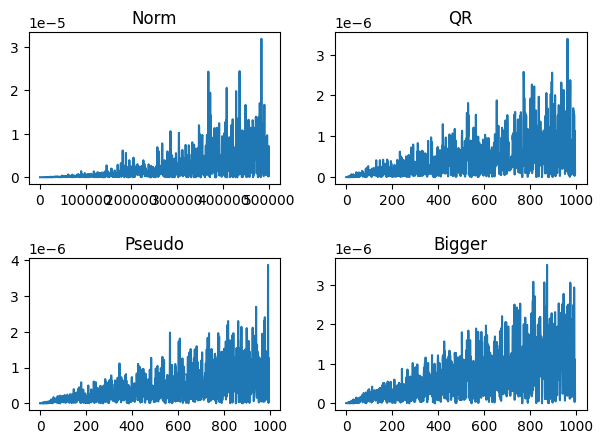

In [765]:
def plotting(cond_list, norm_list, qr_list, pseudo_list, bigger_list):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    ax1.plot(cond_list, norm_list)
    ax1.title.set_text("Norm")
    ax2.plot(qr_list)
    ax2.title.set_text("QR")
    ax3.plot(pseudo_list)
    ax3.title.set_text("Pseudo")
    ax4.plot(bigger_list)
    ax4.title.set_text("Bigger")
    plt.tight_layout(pad=2)
    plt.show()


plotting(cond, norm, qr, pseudo, bigger)

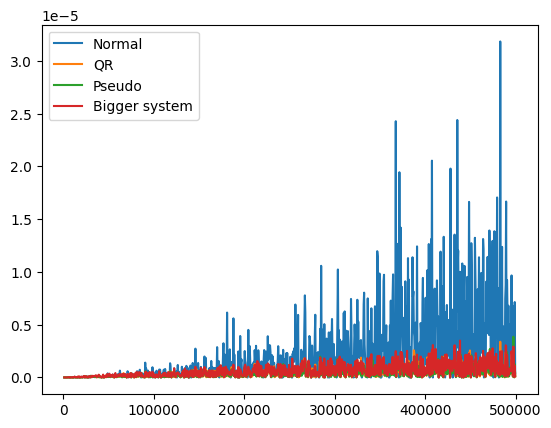

In [769]:
from matplotlib import pyplot as plt

def big_plot(cond_list, norm_list, qr_list, pseudo_list, bigger_list):
    plt.plot(cond_list, norm_list, label="Normal")
    plt.plot(cond_list, qr_list, label="QR")
    plt.plot(cond_list, pseudo_list, label="Pseudo")
    plt.plot(cond_list, bigger_list, label="Bigger system")
    plt.legend()
    plt.show()


big_plot(cond, norm, qr, pseudo, bigger)

As it is seen, for the normal equation the dependence is quadratic w.r.t condition number, while for the other methods it is linear. 

# Problem 3 (30 pts)

A generalisation of the eigenvalue problem is the generalised eigenvalue problem; if an eigenpair satisfies 
$$ Av = \lambda v,$$
then a generalised eigenvalue for a pair $(A,B)$ of matrices makes the matrix 
$$A-\lambda B$$ 
degenerate.
The generalised eigenvector satisfies $Av = \lambda Bv$. In this task we consider matrices $A,B$ are of size  $n\times n$.

## Task 1 (4 pts)

How many generalised eigenvalues are there for each of the following matrix pairs? Find all, if you can:

  1. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 1 \end{bmatrix} $$ 

  2. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix} $$
  
  3. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix}, \quad B = \begin{bmatrix} 0 & 1 \\ 0& 0 \end{bmatrix} $$
  
  4. $$ A = \begin{bmatrix} 1 & 2 \\ 0 & 0 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix} $$

## Task 2 (2 pts)

Assume $\mu$ is not a generalised eigenvalue of $(A,B)$. How are spectra of $(A,B)$ and $((A-\mu B)^{-1}A,(A-\mu B)^{-1}B)$ related?

## Task 3 (24 pts)

To solve the complete generalised eigenvalue problem, [QZ algorithm](https://link.springer.com/content/pdf/10.1007/3-540-28502-4_2) can be used. This algorithm is the direct generalization of the QR algorithm for the standard eigenvalue problem. 
However, in this task we focus on the partial generalised eigenvalue problem and its application to the canonical correlation analysis.

You can test the algorithms in the further tasks only for the symmetric matrices $A$ and symmetric positive definite matrices $B$.

### From power method to its generalisation form

In order to recover the largest generalised eigenvalue and the corresponding eigenvector, one can note that

$$Av = \lambda Bv$$

is equivalent to

$$B^{-1}Av = \lambda v.$$

Therefore, one has to use the power method to $B^{-1}A$ with a random initialisation. 
However, it may be rather expensive to invert $B$ explicitly.
Therefore, we would like to avoid doing that and inexactly apply $B^{-1}$ through the solving linear system $Bx = y$.
Implement the resulting algorithm based on this idea, verify its convergence speed and check that the generalised eigenvalue relation holds.

Important notes that will help you successfully update the classical power method:
 
1) think about how the normalization step should be changed, the energy norm definition $\|x\|^2_A = x^\top A x$ can help in the proper reformultation

2) think how the step $x_{k+1}= Ax_k$ will be updated with the aforementioned notes regarding operations with matrix $B$ 

### From *block* power method to its generalisation form

Just as in the regular eigenvalue case, generalised eigenvalues can be extended to block power method (which can yield the QZ algoritm, analogously to emergence of QR in the regular case). 
The extension is straightforward and consists of replacing vectors with matrices corresponding to the $k$ largest  generalised eigenvectors. 
Moreover, since orthogonality is reqiored, a routine for enforcing orthogonality of the iterates is also needed. Implement the block power method for the generalised eigenvalue problem. 
Pay special attention how the orthogonalisation procedure shown be changed to take into account the matrix $B$.
Separately implement the proper orthoghonalisation algorithm and use it in your code for the target block power method.
Test convergence speed and check that results satisfy the target equation.

In addition, you can check the correctness of your result with ```scipy.linalg.eigh``` function with proper argumets.

### Application of the generalised eignevalue problem to the canonical correlation analysis

When one studies two datasets, it may be desirable to find the orthogonal (in the sense of the inner products induced by the correlation matrices) bases of spaces that capture linear combinations of features that are most correlated between the two datasets. 
Such a problem is called the problem of **canonical correlation analysis** and can be formulated as finding such a sequence $\{(\phi_i, \psi_i)\}$ that for data matrices $X\in\mathbb{R}^{n\times a}, Y\in\mathbb{R}^{n\times b}$

$$(\phi_i, \psi_i)\in \arg\max_{\phi, \psi} \phi^TS_{xy}\psi$$

Subject to:

$$\|\phi\|_{S_x} = \|\psi\|_{S_y} = 1$$

$$\langle\phi, \phi_j\rangle_{S_x} = 0 \quad \forall j<i$$


$$\langle\psi, \psi_j\rangle_{S_y} = 0 \quad \forall j<i,$$

where $\|\cdot\|_A$ is the energy norm induced by $A$, $\langle\cdot,\cdot\rangle_A$ is the inner product induced by $A$, $S_y = \frac{1}{n}Y^\top Y$, $S_x = \frac{1}{n}X^\top X$, $S_{xy} = \frac{1}{n}X^\top Y$

We are asked to find two bases of the maximal-cross-correlation subspace, both orthogonal in the inner product induced by the correlation matrix of the appropriate dataset.

Consider firstly the problem of simply finding a basis of the described space, subject only to unit-vector conditions (since orthogonalisation can always be carried out separately). 
The Lagrangian will then read:

$$L(\phi, \psi, \lambda, \mu) = \phi^TS_{xy}\psi-\lambda(\phi^TS_x\phi-1)-\mu(\psi^TS_y\psi-1),$$

where $\lambda$ and $\mu$ are dual variables.

From the stationarity of Lagrangian with respect ot the original variables $\psi$ and $\phi$ follows the following equation on the dual varibles

$$S_{xy}\psi = \lambda S_x\phi$$

$$S_{yx}\phi = \mu S_y\psi$$

Note that

$$\|\phi\|_{S_x} = \phi^TS_x\phi = \frac{1}{\lambda}\phi^T S_{xy}\psi = \frac{1}{\lambda} \psi^TS_{yx}\phi = \frac{\mu}{\lambda}\psi^TS_y\psi = \frac{\mu}{\lambda}\|\psi\|_{S_y} = \frac{\mu}{\lambda} = 1,$$

Therefore $\mu=\lambda$ and the equations above can be simplified in the following way

$$S_{xy}\psi = \lambda S_x\phi$$

$$S_{yx}\phi = \lambda S_y\psi$$

and the problem admits a block representation:

$$\begin{bmatrix}0 & S_{xy} \\ S_{yx} & 0\end{bmatrix}\begin{bmatrix}\phi\\\psi\end{bmatrix} = \lambda \begin{bmatrix}S_x & 0 \\ 0 & S_y\end{bmatrix}\begin{bmatrix}\phi\\\psi\end{bmatrix}. $$

Surprisingly, this problem has the form of the generalised eigenvalue problem. 
Therefore, the target vectors can be found as the leading eigenvectors and will be an orthonormal basis.

You need to implement the algorithm for extracting $k$ vectors $\psi_i, \phi_i$ from the given data matrices $X \in \mathbb{R}^{n \times d_1}$ and $Y \in \mathbb{R}^{n \times d_2}$.
You should use the power method from the previous task and take into account the special structure of the matrices $(A, B)$ coming from the original problem statment. Please, use this structure for efficient implementation of the internal steps.

### Subtask 1

1. $$\lambda_1 = 1, \lambda_2 = 3$$
   Hence:
   $$det(\begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix} - 1 *  \begin{bmatrix} 1 & 0 \\ 0& 1 \end{bmatrix}) = 0$$
   $$det(\begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix} - 3 *  \begin{bmatrix} 1 & 0 \\ 0& 1 \end{bmatrix}) = 0$$

2. $$\lambda_1 = 1, \lambda_2 = 3$$
   Hence:
   $$det(\begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix} - 1 *  \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix}) = 0$$
   $$det(\begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix} - 3 *  \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix}) = -6$$

3. $$\lambda_1 = 1, \lambda_2 = 3$$
   Hence:
   $$det(\begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix} - 1 *  \begin{bmatrix} 0 & 1 \\ 0& 0 \end{bmatrix}) = 3$$
   $$det(\begin{bmatrix} 1 & 2 \\ 0 & 3 \end{bmatrix} - 3 *  \begin{bmatrix} 0 & 1 \\ 0& 0 \end{bmatrix}) = 3$$

4. $$\lambda_1 = 0, \lambda_2 = 1$$

   Hence:
   $$det(\begin{bmatrix} 1 & 2 \\ 0 & 0 \end{bmatrix} - 0 *  \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix}) = 0$$
   $$det(\begin{bmatrix} 1 & 2 \\ 0 & 0 \end{bmatrix} - 1 *  \begin{bmatrix} 1 & 0 \\ 0& 0 \end{bmatrix}) = 0$$   

The final list of the generalised eigenvalues for each case:

1. $\lambda_1 = 1, \lambda_2 = 3$
2. $\lambda_1 = 1$
3. $-$
4. $\lambda_1 = 0, \lambda_2 = 1$, but not only these ones. Generally, because of the case itself, the amount of generalized lambdas is infinite.

### Subtask 2

Note that there are $(A-\mu B)^{-1}$ on the both sides of the pair $((A-\mu B)^{-1}A,(A-\mu B)^{-1}B)$, so spectra of $(A,B)$ and $((A-\mu B)^{-1}A,(A-\mu B)^{-1}B)$ are the same.

In [29]:
# Your code is here

- You are further asked to test the developed algorithm on an arbitrary splitting of the MNIST dataset (import it from [keras](https://keras.io/api/datasets/mnist/), [PyTorch](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST), etc). Test different values of $k$.
- In addition, test it on synthetic data of known covariance. 
You can generate bivariate data with known covariance matrix through the multiplication of vectors from standard normal distribution by the Cholesky factor of the desired covariance matrix.
Then split the generated bivaritate data into two univariate vectors. Run the prepared code and comment on the obtained results.

In [ ]:
# Your code is here